# Tree

## Binary tree

> Each node have zero, one or two child and each node have only one parent

In [1]:
# Structure of a Binary Tree Node
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

### We have 2 types of Binary Tree
| Perfect Binary Tree | Full Binary Tree |
| --- | --- |
| 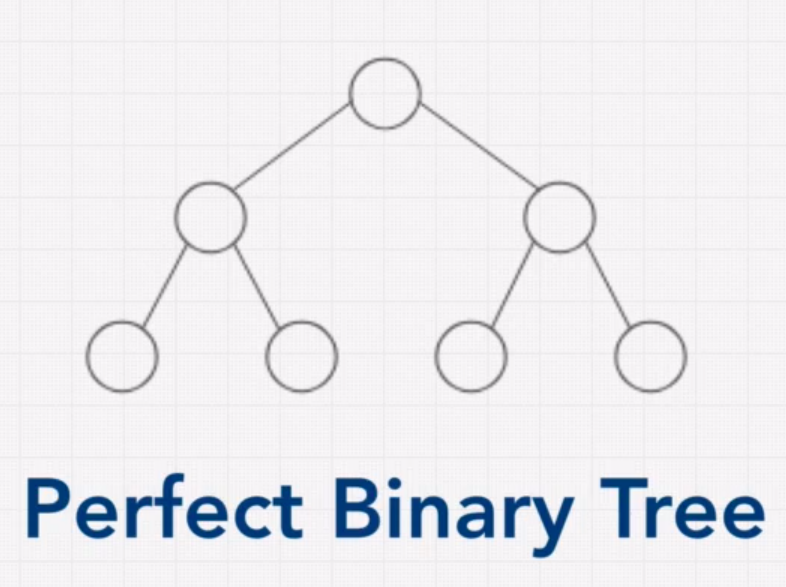 | 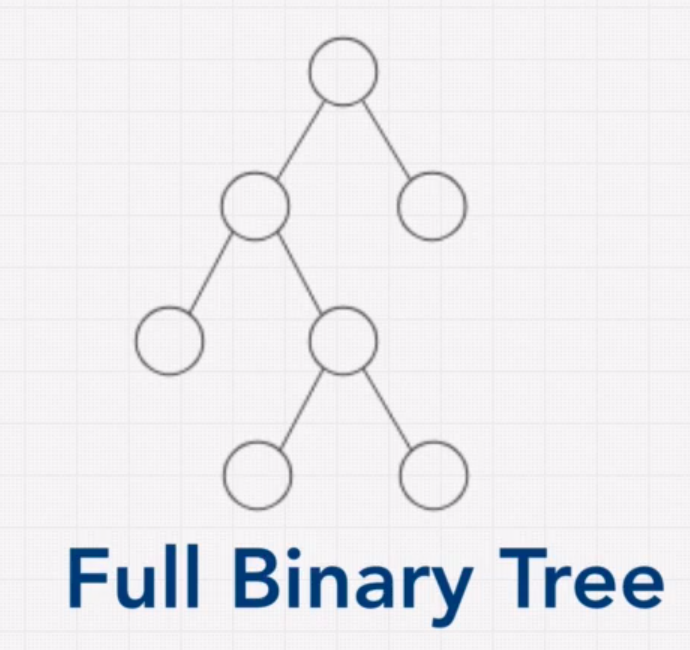 |

> with Perfect Binary Tree usually use in **Binary Search Tree**

> Notice: A binary Seach tree is a tree with value of left node < **Node value**, right node > Node value. Always that.


**An Interview Question:** Why a unbalance Binary Search Tree really bad ?

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
    
    def __repr__(self):
        lines = []
        if self.right:
            found = False
            for line in repr(self.right).split("\n"):
                if line[0] != " ":
                    found = True
                    line = " ┌─" + line
                elif found:
                    line = " | " + line
                else:
                    line = "   " + line
                lines.append(line)
        lines.append(str(self.value))
        if self.left:
            found = False
            for line in repr(self.left).split("\n"):
                if line[0] != " ":
                    found = True
                    line = " └─" + line
                elif found:
                    line = "   " + line
                else:
                    line = " | " + line
                lines.append(line)
        return "\n".join(lines)
    

class BinarySearchTree:
    def __init__(self):
        self.root = None
    
    def insert(self, value):
        new_node = Node(value)
        if self.root == None:
            self.root = new_node
            return
        else:
            current_node = self.root
            while(True):
                if value < current_node.value:
                    # left
                    if not current_node.left:
                        current_node.left = new_node
                        return
                    current_node = current_node.left
                else:
                    # right
                    if not current_node.right:
                        current_node.right = new_node
                        return
                    current_node = current_node.right
        
    
    def lookup(self, value):
        if not self.root:
            return False
        current_node = self.root
        while(current_node):
            if value < current_node.value:
                current_node = current_node.left
            elif value > current_node.value:
                current_node = current_node.right
            else:
                return current_node
        return False
    
    def remove(self, value):
        if not self.root:
            return False
        current_node = self.root
        parent_node = None
        while(current_node):
            if value < current_node.value:
                parent_node = current_node
                current_node = current_node.left
            elif value > current_node.value:
                parent_node = current_node
                current_node = current_node.right
            else:
                # Option 1: No right Child
                if current_node.right is None:
                    if parent_node is None:
                        self.root = current_node.left # if no right, left become root
                    else:  # if parent_node exist (have own value)
                        # if parent value > current value => left become left child of parent
                        if parent_node.value > current_node.value:
                            parent_node.left = current_node.left
                        # if parent value < current value => current.left become right child of parent
                        else:
                            parent_node.right = current_node.left
                # Option 2: Right child doesn't have left child
                elif current_node.right.left is None:
                    if parent_node is None:
                        self.root = current_node.right
                    else:  # if parent_node exist (have own value)
                        # if parent value < current value => right become right child of parent
                        if parent_node.value < current_node.value:
                            parent_node.right = current_node.right
                        # if parent value > current value => current.right become left of parent
                        if parent_node.value > current_node.value:
                            parent_node.left = current_node.right
                # Option 3: Right child have a left child
                else:
                    # Find the Right child's left most child
                    left_most = current_node.right.left
                    left_most_parent = current_node.right
                    while(left_most.left is not None):
                        left_most_parent = left_most
                        left_most = left_most.left
                    # Parent's left subtree become => become left's most right subtree
                    left_most_parent.left = left_most.right
                    left_most.left = current_node.left
                    left_most.right = current_node.right
                    
                    if parrent_node is None:
                        self.root = left_most
                    else:
                        if current_node.value < parrent_node.value:
                            parrent_node.left = left_most
                        elif current_node.value > parrent_node.value:
                            parrent_node.right = left_most
        return True


tree = BinarySearchTree()
tree.insert(38)
tree.insert(43)
tree.insert(40)
tree.insert(34)
tree.insert(77)
tree.insert(42)
tree.insert(39)
print(str(tree.root))

tree.lookup(80)

# tree.remove(40)
# print(str(tree.root))
